
## Feature engineering

#### Les données

In [68]:
# dependencies
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint

import sys

# custom functions
import os

# Go up to the parent directory (the project folder)
project_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add this path to the sys.path
if project_dir not in sys.path:
    sys.path.append(project_dir)

# import your function from the SRC directory
from SRC.Functions import display_dataframe_summary_cf, check_missing_values

pd.options.display.float_format = '{:.2f}'.format


# librairies versions
print("python version", sys.version[:6])
print("Pandas version", pd.__version__)
print("Numpy version", np.__version__)
print("Matplotlib version", mpl.__version__)
print("Seaborn version", sns.__version__)

python version 3.13.2
Pandas version 2.3.3
Numpy version 2.3.4
Matplotlib version 3.10.7
Seaborn version 0.13.2


In [69]:
# Load the dataset
data = pd.read_csv('../DATA/data_cleaned.csv')

df = data.copy()

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Team    271116 non-null  object 
 4   NOC     271116 non-null  object 
 5   Games   271116 non-null  object 
 6   Year    271116 non-null  int64  
 7   Season  271116 non-null  object 
 8   City    271116 non-null  object 
 9   Sport   271116 non-null  object 
 10  Event   271116 non-null  object 
 11  Medal   271116 non-null  object 
 12  Age     271116 non-null  float64
 13  BMI     271116 non-null  float64
dtypes: float64(2), int64(2), object(10)
memory usage: 29.0+ MB


#### Variable 'Year_City_Season'

Historiquement, les Jeux Olympiques d'été et d'hiver ont eu lieu la même année pendant une certaine période  
Plus précisément :

- De 1924 à 1992 : Les Jeux Olympiques d'été et d'hiver se sont déroulés la même année, tous les quatre ans
- À partir de 1994 : Le Comité International Olympique (CIO) a décidé de décaler les Jeux Olympiques d'hiver de deux ans par rapport aux Jeux d'été.
Ainsi, depuis 1994, il y a toujours des Jeux Olympiques tous les deux ans, alternant entre les Jeux d'été et les Jeux d'hiver

**Afin d'être plus précis lors de nos analyses futures, nous allons créer un nouvelle variable qui intègrera l'année, la ville des épreuves et la saison été ou hiver**

In [71]:
def combine_year_season_city(row):
    """Combines the year, season, and city into a single string, with 'W' or 'S' for the season."""
    abbreviated_season = 'W' if row['Season'] == 'Winter' else 'S'
    year_str = str(row['Year'])[:4]  # Extract the first 4 characters of the year
    return f"{year_str}_{row['City']}_{abbreviated_season}"

# Apply the function to create the new column
df['Year_City_Season'] = df.apply(combine_year_season_city, axis=1)

# Display the first few rows of the DataFrame with the new column
print(df[['Year', 'Season', 'City', 'Year_City_Season']].head())

   Year  Season       City  Year_City_Season
0  1992  Summer  Barcelona  1992_Barcelona_S
1  2012  Summer     London     2012_London_S
2  1920  Summer  Antwerpen  1920_Antwerpen_S
3  1900  Summer      Paris      1900_Paris_S
4  1988  Winter    Calgary    1988_Calgary_W


*Nous décidons de conserver aussi les variables 'Year', 'City' et 'Season' pour plus de flexibilité dans les analyses futures*

#### Traitements de la variable 'NOC'

In [72]:
df['NOC'].unique()

array(['CHN', 'DEN', 'NED', 'USA', 'FIN', 'NOR', 'ROU', 'EST', 'FRA',
       'MAR', 'ESP', 'EGY', 'IRI', 'BUL', 'ITA', 'CHA', 'AZE', 'SUD',
       'RUS', 'ARG', 'CUB', 'BLR', 'GRE', 'CMR', 'TUR', 'CHI', 'MEX',
       'URS', 'NCA', 'HUN', 'NGR', 'ALG', 'KUW', 'BRN', 'PAK', 'IRQ',
       'UAR', 'LIB', 'QAT', 'MAS', 'GER', 'CAN', 'IRL', 'AUS', 'RSA',
       'ERI', 'TAN', 'JOR', 'TUN', 'LBA', 'BEL', 'DJI', 'PLE', 'COM',
       'KAZ', 'BRU', 'IND', 'KSA', 'SYR', 'MDV', 'ETH', 'UAE', 'YAR',
       'INA', 'PHI', 'SGP', 'UZB', 'KGZ', 'TJK', 'EUN', 'JPN', 'CGO',
       'SUI', 'BRA', 'FRG', 'GDR', 'MON', 'ISR', 'URU', 'SWE', 'ISV',
       'SRI', 'ARM', 'CIV', 'KEN', 'BEN', 'UKR', 'GBR', 'GHA', 'SOM',
       'LAT', 'NIG', 'MLI', 'AFG', 'POL', 'CRC', 'PAN', 'GEO', 'SLO',
       'CRO', 'GUY', 'NZL', 'POR', 'PAR', 'ANG', 'VEN', 'COL', 'BAN',
       'PER', 'ESA', 'PUR', 'UGA', 'HON', 'ECU', 'TKM', 'MRI', 'SEY',
       'TCH', 'LUX', 'MTN', 'CZE', 'SKN', 'TTO', 'DOM', 'VIN', 'JAM',
       'LBR', 'SUR',

- Nous remarquons la présence des codes NOC 'RUS' (Fédération de Russie) et 'URS' (Union des Républiques socialistes soviétiques, ce pays n'existe plus depuis 1991)

- Nous remarquons la présence de NOC = EUN qui représente l'Équipe unifiée et qui a participé aux Jeux olympiques d'hiver de 1992 à Albertville et aux Jeux olympiques d'été de 1992 à Barcelone  

- Nous remarquons la présence de NOC: GER, FRG et GDR correspondant respectivement à l'Allemagne unififée, à l'Allemagne de l'ouest et à l'Allemagne de l'est  

Conclusion: nous devons analyser les performances **par périodes**, découper l'analyse par périodes historiques n'est pas seulement judicieux, c'est essentiel pour toute étude rigoureuse des performances olympiques sur le long terme  

- **Période 1 : De 1896 à 1948 (avant la Guerre Froide)**

Contexte : Période pré-guerre froide. L'URSS n'a pas encore participé aux Jeux Olympiques et l'Allemagne n'est pas divisée.

Intérêt de l'analyse : Établir une ligne de base des performances des pays avant les grandes confrontations idéologiques et les changements de frontières.

- **Période 2 : De 1952 à 1988 (pendant la Guerre Froide)**

Contexte : La Guerre Froide bat son plein. L'URSS participe activement, devenant une puissance olympique majeure. L'Allemagne est divisée en 'FRG' et 'GDR', et ces deux entités se livrent une compétition acharnée pour la suprématie sportive.

Intérêt de l'analyse : Permet d'analyser l'impact de la division politique et de l'affrontement Est-Ouest sur les médailles. C'est la seule période où les performances de la RDA et de la RFA peuvent être étudiées séparément.

- **Période 3 : De 1992 à 2016 (après la Guerre Froide)**

Contexte : Après la chute de l'URSS et la réunification de l'Allemagne. La carte géopolitique a été redessinée. De nouveaux pays (comme l'Ukraine) émergent sur la scène olympique. L'Allemagne réunifiée concourt sous le code 'GER'.

In [73]:
# Create a new 'period' column based on historical events
def categorize_period(year):
    """
    Categorizes a given Olympic year into a specific historical period.
    
    Args:
        year (int): The year of the Olympic Games.
        
    Returns:
        str: The corresponding historical period name.
    """
    if 1896 <= year <= 1948:
        # Before the Cold War, a time of early modern Olympics
        return 'Pre_Cold_War'
    elif 1952 <= year <= 1988:
        # The Cold War era, marked by political rivalries including US vs. USSR
        return 'Cold_War'
    elif 1992 <= year <= 2016:
        # The period following the fall of the Berlin Wall and the dissolution of the USSR
        return 'Post_Cold_War'
    else:
        # Catch-all for any years outside the defined ranges
        return 'Other'


In [74]:
df['Period'] = df['Year'].apply(categorize_period)

In [75]:
df.head(3)

,ID,Name,Sex,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Age,BMI,Year_City_Season,Period
0,1,A Dijiang,M,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,24.00,24.69,1992_Barcelona_S,Post_Cold_War
1,2,A Lamusi,M,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,23.00,20.76,2012_London_S,Post_Cold_War
2,3,Gunnar Nielsen Aaby,M,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,24.00,18.77,1920_Antwerpen_S,Pre_Cold_War


#### Variable 'Medal_score'

In [76]:
# Initialize the new 'medal_score' column with a default value of 0 for all rows
df['Medal_score'] = 0

# Assign points based on the medal type for each condition
# Use .loc to select rows where the 'Medal' column is 'Gold' and assign a score of 3
df.loc[df['Medal'] == 'Gold', 'Medal_score'] = 3

# For rows with a 'Silver' medal, assign a score of 2
df.loc[df['Medal'] == 'Silver', 'Medal_score'] = 2

# For rows with a 'Bronze' medal, assign a score of 1
df.loc[df['Medal'] == 'Bronze', 'Medal_score'] = 1

#### Création dataframes

- Dataframe sans le no_medals (df_medals)

In [77]:
# Create a list of desired medal types
medal_list = ['Bronze', 'Silver', 'Gold']

# Use .loc to filter the DataFrame and create a new DataFrame
df_medals = df.loc[df['Medal'].isin(medal_list), :].copy()

In [78]:
df_medals['Medal'].value_counts()

Medal
Gold      13372
Bronze    13295
Silver    13116
Name: count, dtype: int64

- Dataframe par saison

In [79]:
# Create dataframe for Winter and Summer events
df_medals_winter = df_medals[df_medals['Season'] == 'Winter']
df_medals_summer = df_medals[df_medals['Season'] == 'Summer']

- Dataframe par 'Period'

In [80]:
# Création du DataFrame pour la période 'Pre_Cold_War'
pre_cold_war_df = df_medals[df_medals['Period'] == 'Pre_Cold_War'].copy()
pre_cold_war_df_w = pre_cold_war_df[pre_cold_war_df['Season'] == 'Winter']
pre_cold_war_df_s = pre_cold_war_df[pre_cold_war_df['Season'] == 'Summer']

# Création du DataFrame pour la période 'Cold_War'
cold_war_df = df_medals[df_medals['Period'] == 'Cold_War'].copy()
cold_war_df_w = cold_war_df[cold_war_df['Season'] == 'Winter']
cold_war_df_s = cold_war_df[cold_war_df['Season'] == 'Summer']

# Création du DataFrame pour la période 'Post_Cold_War'
post_cold_war_df = df_medals[df_medals['Period'] == 'Post_Cold_War'].copy()
post_cold_war_df_w = post_cold_war_df[post_cold_war_df['Season'] == 'Winter']
post_cold_war_df_s = post_cold_war_df[post_cold_war_df['Season'] == 'Summer']

- Dataframe FRA

In [81]:
df_fra = df[df['NOC'] == 'FRA'].copy()
df_medals_fra = df_medals[df_medals['NOC'] == 'FRA'].copy()
df_medals_fra_w = df_medals_fra[df_medals_fra['Season'] == 'Winter'].copy()
df_medals_fra_s = df_medals_fra[df_medals_fra['Season'] == 'Summer'].copy()

## Analyse des performances

### Top 10 performers

In [82]:
import plotly.graph_objects as go
import pandas as pd

def plot_top_olympic_performers(data, season, noc, width: int = 1000, height: int = 600):
    """
    Creates an interactive stacked bar chart of the top 10 Olympic athletes
    based on their total medal count. The tooltip displays the NOC, medal
    breakdown, and total score, without the athlete's name.

    Args:
        data (pd.DataFrame): The DataFrame containing medal data with
                                  'Name', 'NOC', and 'Medal_score' columns.
        season (srt)
        noc (str)
        width (int): The width of the graph in pixels.
        height (int): The height of the graph in pixels.

    Returns:
        go.Figure: A Plotly Figure object representing the chart.
    """
    # 1. Aggregate Data by Athlete
    top_performers_details = data.groupby(["Name", "NOC"]).agg(
        total_score=('Medal_score', 'sum'),
        total_medals=('Medal_score', 'count'),
        gold_medals=('Medal_score', lambda x: (x == 3).sum()),
        silver_medals=('Medal_score', lambda x: (x == 2).sum()),
        bronze_medals=('Medal_score', lambda x: (x == 1).sum())
    ).nlargest(10, 'total_score').reset_index()

    # 2. Initialize the Plotly Figure
    fig = go.Figure()

    # 3. Add Visible Traces for Each Medal Type
    # These traces form the visible stacked bars. Their tooltips are disabled.
    fig.add_trace(go.Bar(
        x=top_performers_details['Name'],
        y=top_performers_details['gold_medals'],
        name='Gold Medals',
        marker_color='gold',
        hovertemplate="" # No tooltip on this trace
    ))

    fig.add_trace(go.Bar(
        x=top_performers_details['Name'],
        y=top_performers_details['silver_medals'],
        name='Silver Medals',
        marker_color='silver',
        hovertemplate="" # No tooltip on this trace
    ))

    fig.add_trace(go.Bar(
        x=top_performers_details['Name'],
        y=top_performers_details['bronze_medals'],
        name='Bronze Medals',
        marker_color='#CD7F32',
        hovertemplate="" # No tooltip on this trace
        
    ))

    # 4. Add a Single, Invisible Trace for the Tooltip
    # This trace carries all the data for a single, clean tooltip.
    custom_hover_template = '<b>NOC: %{customdata[0]}<br>' + \
                            'Total Score: %{customdata[4]}<extra></extra></b>'

    fig.add_trace(go.Bar(
        x=top_performers_details['Name'],
        y=top_performers_details['total_medals'],
        name='Tooltip Data',
        marker_color='rgba(0,0,0,0)', # Set color to be completely transparent
        hovertemplate=custom_hover_template,
        customdata=top_performers_details[['NOC',
                                           'gold_medals',
                                           'silver_medals',
                                           'bronze_medals',
                                           'total_score']].values,
        showlegend=False
        
    ))
    
    # 5. Update the Graph Layout
    max_medals = top_performers_details['total_medals'].max()
    fig.update_layout(
        barmode='relative', # Use 'relative' to layer the transparent trace
        title=f'<b>Top 10 Olympic Performers by Score</b>    <i>{season}    NOC = {noc}',
        xaxis_title='Athlete',
        yaxis_title='Number of Medals',
        legend_title='Medal Type',
        xaxis={'categoryorder':'total descending'},
        width=width,
        height=height,
        hovermode='x unified',
        showlegend=True,
        yaxis_range=[0, max_medals * 1.1]
    )

    # Add the formula as a separate, non-conflicting text label in the title
    fig.layout.title.text += '<br><sup>Formula Score = 3*Gold + 2*Silver + 1*Bronze</sup>'

    fig.show(renderer="notebook_connected")

    return top_performers_details
    

- All season

In [83]:
plot_top_olympic_performers(df_medals, season='All seasons', noc='All')

,Name,NOC,total_score,total_medals,gold_medals,silver_medals,bronze_medals
0,"Michael Fred Phelps, II",USA,77,28,23,3,2
1,Larysa Semenivna Latynina (Diriy-),URS,41,18,9,5,4
2,Nikolay Yefimovich Andrianov,URS,34,15,7,5,3
3,Ole Einar Bjrndalen,NOR,33,13,8,4,1
4,Paavo Johannes Nurmi,FIN,33,12,9,3,0
5,Borys Anfiyanovych Shakhlin,URS,31,13,7,4,2
6,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",USA,31,12,8,3,1
7,Sawao Kato,JPN,31,12,8,3,1
8,Edoardo Mangiarotti,ITA,30,13,6,5,2
9,Mark Andrew Spitz,USA,30,11,9,1,1


- Winter season

In [84]:
plot_top_olympic_performers(df_medals_winter, season='Winter season', noc='All')

,Name,NOC,total_score,total_medals,gold_medals,silver_medals,bronze_medals
0,Ole Einar Bjrndalen,NOR,33,13,8,4,1
1,Marit Bjrgen,NOR,25,10,6,3,1
2,Claudia Pechstein,GER,21,9,5,2,2
3,Edy Sixten Jernberg,SWE,20,9,4,3,2
4,Raisa Petrovna Smetanina,URS,20,9,3,5,1
5,Yang Yang,CHN,20,10,2,6,2
6,"Irene Karlijn ""Ireen"" Wst",NED,19,8,4,3,1
7,Ricco Gro,GER,19,8,4,3,1
8,Arnold Clas Robert Thunberg,FIN,18,7,5,1,1
9,Galina Alekseyevna Kulakova,URS,18,8,4,2,2


- Summer season

In [85]:
plot_top_olympic_performers(df_medals_summer, season='Summer season', noc='All')

,Name,NOC,total_score,total_medals,gold_medals,silver_medals,bronze_medals
0,"Michael Fred Phelps, II",USA,77,28,23,3,2
1,Larysa Semenivna Latynina (Diriy-),URS,41,18,9,5,4
2,Nikolay Yefimovich Andrianov,URS,34,15,7,5,3
3,Paavo Johannes Nurmi,FIN,33,12,9,3,0
4,Borys Anfiyanovych Shakhlin,URS,31,13,7,4,2
5,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",USA,31,12,8,3,1
6,Sawao Kato,JPN,31,12,8,3,1
7,Edoardo Mangiarotti,ITA,30,13,6,5,2
8,Mark Andrew Spitz,USA,30,11,9,1,1
9,"Raymond Clarence ""Ray"" Ewry",USA,30,10,10,0,0


### Top 10 NOCs par période

#### Graphique statique

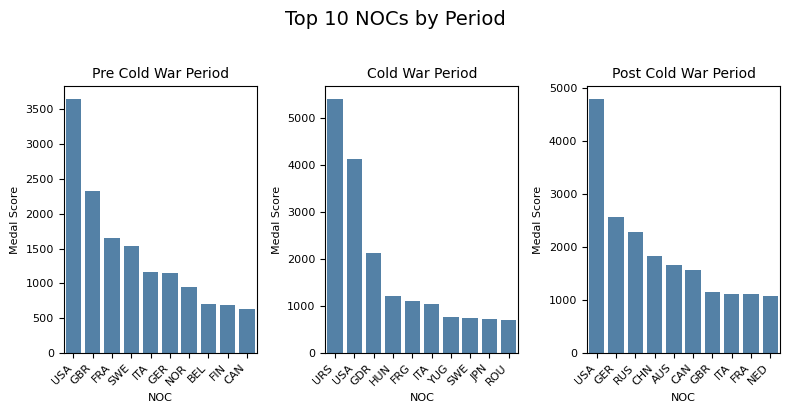

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a single row and three columns for the plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))

# Define the data and titles for the plots, including colors
data_and_titles = {
    'Pre-Cold War': (pre_cold_war_df, 'Pre Cold War Period', 'steelblue'),
    'Cold War': (cold_war_df, 'Cold War Period', 'steelblue'),
    'Post-Cold War': (post_cold_war_df, 'Post Cold War Period', 'steelblue')
}

# Add a super title to the entire figure
fig.suptitle('Top 10 NOCs by Period', fontsize=14, y=1.02)

# Iterate over the data and axes to create each plot
for ax, (period, (data, title, color)) in zip(axes, data_and_titles.items()):

    top_10_nocs = data.groupby('NOC')['Medal_score'].sum().nlargest(10)

    sns.barplot(x=top_10_nocs.index, y=top_10_nocs.values, ax=ax, color='steelblue')
    # Plot the data using seaborn without the palette warning
    #sns.barplot(x=data.index, y=data.values, ax=ax, color=color)

    # Set the title, labels, and properties for the current subplot
    ax.set_title(title, size=10)
    ax.set_xlabel('NOC', size=8)
    ax.set_ylabel('Medal Score', size=8)

    # Correct way to set tick properties to avoid the UserWarning
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', size=8)
    plt.setp(ax.get_yticklabels(),  size=8)
    
# Adjust layout to prevent titles and labels from overlapping
plt.tight_layout()
plt.show()


#### Graphique interactif (Plotly)

- Préparation des données

In [87]:
# Gather the initial period DataFrames into a dictionary
period_dfs = {
    'Pre_Cold_War': pre_cold_war_df,
    'Cold_War': cold_war_df,
    'Post_Cold_War': post_cold_war_df
}

# Dictionary to store the final, aggregated Top 10 DataFrames.
top_10_results = {}

# FOR loop to apply the transformations to each period DataFrame
for period_name, df_temp in period_dfs.items():
    
    # Create the Gold, Silver, Bronze columns using one-hot encoding (get_dummies).
    # Each row will now have a 'True' (or 1) for the medal it represents.
    df_with_medals = pd.get_dummies(df_temp[['NOC', 'Medal_score', 'Medal']], 
                                     columns=['Medal'], prefix='', prefix_sep='')
    
    # Explicitly convert the boolean columns (True/False) to integers (1/0) 
    # so they can be summed up.
    df_with_medals[['Gold', 'Silver', 'Bronze']] = df_with_medals[['Gold', 'Silver', 'Bronze']].astype(int)

    # Group the data by NOC and sum all columns (scores and medal counts).
    grouped_df = df_with_medals.groupby('NOC').sum().reset_index()

    # Determine the Top 10 NOCs for the current period based on 'Medal_score'.
    top_10 = grouped_df.nlargest(10, 'Medal_score')
    
    # Store the resulting Top 10 DataFrame in the results dictionary, keyed by the period name.
    top_10_results[period_name] = top_10

# Extract the final DataFrames from the dictionary for direct use in plotting
pre_cold_war_top_10 = top_10_results['Pre_Cold_War']
cold_war_top_10 = top_10_results['Cold_War']
post_cold_war_top_10 = top_10_results['Post_Cold_War']

- Visualisation

In [88]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go 

# --- Data Preparation
# Create a dictionary mapping the desired subplot title to its corresponding Top 10 DataFrame.
plot_data_dict = {
    'Before Cold War period': pre_cold_war_top_10,
    'Cold War period': cold_war_top_10,
    'After Cold War period': post_cold_war_top_10
}

# Store the dictionary keys (the titles) in a list to ensure the plotting order.
plot_order = list(plot_data_dict.keys())

# --- Figure and Subplot Creation ---
# Create the figure with 1 row and 3 columns.
fig = make_subplots(
    rows=1, 
    cols=3,
    # Use the ordered list of keys as the subplot titles.
    subplot_titles=plot_order 
)

# --- Add Traces using a FOR Loop ---
# Iterate over the plot order list, getting the index (i) and the title.
for i, title in enumerate(plot_order):
    
    # Access the correct DataFrame using the current title as the dictionary key.
    data_df = plot_data_dict[title]
    
    # Add a bar trace (plot) to the figure.
    fig.add_trace(
        go.Bar(
            # X-axis: NOC codes
            x=data_df['NOC'],
            # Y-axis: Total medal score
            y=data_df['Medal_score'],
            marker_color='steelblue',
            # Store Gold, Silver, Bronze counts for custom hover text.
            customdata=data_df[['Medal_score', 'Gold', 'Silver', 'Bronze']],
            # Define the content of the hover tooltip.
            hovertemplate="""<b>NOC: %{x}</b><br>
Medal Score: %{y}<br>
Gold: %{customdata[1]}<br>
Silver: %{customdata[2]}<br>
Bronze: %{customdata[3]}
<extra></extra>"""
        ),
        # Specify the position: row 1, and column based on the loop index (i + 1).
        row=1, col=i + 1 
    )

# --- Layout Configuration ---
# Update the overall figure layout.
fig.update_layout(
    title_text='Top 10 NOCs by Period',
    height=600,
    width=1000, 
    showlegend=False,
    # Rotate X-axis ticks for better readability.
    xaxis_tickangle=-45,
    xaxis2_tickangle=-45,
    xaxis3_tickangle=-45,
    font=dict(size=12),
)

# Display the figure (specific to notebook environments).
fig.show(renderer="notebook_connected")

### Nouveau score OPA (Olympic Performance assessment)

#### Définition score OPA

Nous allons essayer de mesurer la performance globale, et pas seulement le succès sur le podium en créant un score  

Ce score est une métrique plus complète qui intègre trois dimensions pour évaluer la qualité de la performance d'un pays :

- Performance pure : Le nombre et la valeur des médailles gagnées *par session*. C'est l'indicateur de base, mais il est pondéré pour ne pas être le seul critère.

- Diversité : La capacité à gagner des médailles dans un large éventail de sports, montrant la force du pays dans différentes disciplines et pas seulement dans une ou deux.

- Régularité : La constance de la participation et du succès au fil du temps, récompensant la pérennité plutôt que les performances exceptionnelles mais isolées.

En pondérant ces trois facteurs, le score final offre un comparatif plus juste et plus nuancé de la puissance sportive d'un pays. Il répond à la question : "Quel pays a la performance olympique la plus complète sur le long terme ?" plutôt que "Quel pays a gagné le plus de médailles ?".

Voici le détail du calcul:  

Score = Performance pure * Diversité * Régularité  
Score = 0.5(3*Gold + 2*Silver + 1*Bronze) * 0.2(participating sports / total sports) * 0.3(participating sessions / total sessions)


#### Fonction pour calculer score OPA et préparer les données

In [89]:
import pandas as pd

def calculate_and_process_opa(df: pd.DataFrame) -> pd.DataFrame:
    
    # Global constants
    WEIGHTS = {'medals': 0.5, 'diversity': 0.2, 'regularity': 0.3}
    MEDAL_POINTS = {'Gold': 3, 'Silver': 2, 'Bronze': 1}

    # Global metric
    TOTAL_SESSIONS = df['Year_City_Season'].nunique()
    
    # Calculate Medal Points and necessary session metrics
    processed_df = (
        df.copy()
        .assign(
            Medal_Points=lambda x: x['Medal'].map(MEDAL_POINTS).fillna(0),
            Total_Sports_Session=lambda x: x.groupby('Year_City_Season')['Sport'].transform('nunique')
        )
    )

    # Aggregate metrics per Session/NOC
    session_metrics = (
        processed_df.groupby(['NOC', 'Year_City_Season']).agg(
            Medal_Score_Session=('Medal_Points', 'sum'),
            NOC_Sports_Session=('Sport', 'nunique'),
            Total_Sports_Session=('Total_Sports_Session', 'first')
        ).reset_index()
    )

    # Calculate Raw Scores (Medal, Diversity, Regularity)
    final_scores_raw = (
        processed_df.groupby('NOC')['Medal'].value_counts().unstack(fill_value=0)
        .pipe(lambda x: x.rename_axis(None, axis=1)) # Remove 'Medal' column axis name
        .assign(
            Medal_Score=session_metrics.groupby('NOC')['Medal_Score_Session'].mean(),
            Diversity_Score=lambda x: (
                session_metrics.assign(
                    Diversity_Score_Session=lambda y: y['NOC_Sports_Session'] / y['Total_Sports_Session']
                ).groupby('NOC')['Diversity_Score_Session'].mean()
            ),
            Regularity_Score=lambda x: (
                session_metrics.groupby('NOC')['Year_City_Season'].count() / TOTAL_SESSIONS
            )
        )
        .fillna(0)
    )
    
    # Ensure all medal columns exist for normalization
    for medal in ['Gold', 'Silver', 'Bronze']:
        if medal not in final_scores_raw.columns:
            final_scores_raw[medal] = 0

    # Normalization (0-100) and Final OPA Score Calculation
    def min_max_normalize(series: pd.Series) -> pd.Series:
        min_val, max_val = series.min(), series.max()
        return ((series - min_val) / (max_val - min_val)) * 100 if max_val > min_val else 0.0

    final_df = final_scores_raw.copy()
    score_types = ['Medal_Score', 'Diversity_Score', 'Regularity_Score']
    
    for score_type in score_types:
        final_df[f'{score_type}_norm'] = min_max_normalize(final_df[score_type])

    # Calculate final OPA score
    final_df['OPA_Score'] = (
        WEIGHTS['medals'] * final_df['Medal_Score_norm'] +
        WEIGHTS['diversity'] * final_df['Diversity_Score_norm'] +
        WEIGHTS['regularity'] * final_df['Regularity_Score_norm']
    ).round(2)
    
    # Sort, select top 10, format, and reorder columns
    return (
        final_df.sort_values(by='OPA_Score', ascending=False).head(10)
        .reset_index(names=['NOC']) # Convert index to 'NOC' column
        [['NOC', 'OPA_Score', 'Gold', 'Silver', 'Bronze']]
    )

#### Fonction pour visualiser les données

In [90]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

def plot_top_nocs_medals_by_period(
    pre_cold_war_df: pd.DataFrame,
    cold_war_df: pd.DataFrame,
    post_cold_war_df: pd.DataFrame,
    season:str
) -> go.Figure:
    
    # 1. DATA PREPARATION AND CONFIGURATION
    
    # Initial grouping of DataFrames and titles
    dfs_original = [pre_cold_war_df, cold_war_df, post_cold_war_df]
    subplot_titles = (
        'Before Cold War period',
        'Cold War period',
        'After Cold War period'
    )
    medal_types = ['Gold', 'Silver', 'Bronze']
    colors = {'Gold': 'gold', 'Silver': 'silver', 'Bronze': 'brown'}
    score_column = 'OPA_Score'
    
    # Calculate totals and max Y in a single loop (Independent Y-Axes)
    modified_data = []
    max_y_values = []
    
    for df in dfs_original:
        df_mod = df.copy()
        df_mod['Total'] = df_mod[medal_types].sum(axis=1)
        # Calculate max Y for the independent axis with a 5% margin
        max_y_values.append(df_mod['Total'].max() * 1.05)
        modified_data.append(df_mod)
        
    # Define hover template string for the phantom trace
    hovertemplate_string = "<b>Score vs Top1: %{customdata[3]:.0f}%</b><extra></extra>"

    # 2. CREATE THE FIGURE
    fig = make_subplots(
        rows=1,
        cols=3,
        subplot_titles=subplot_titles
    )

    # 3. ADD TRACES AND UPDATE AXES (Single loop)
    for i, df in enumerate(modified_data):
        col_num = i + 1
        
        # Prepare customdata (Gold, Silver, Bronze, Score)
        custom_data = df[medal_types + [score_column]].values
        
        # 3.1. Visible Traces (Gold, Silver, Bronze)
        for medal_type in medal_types:
            fig.add_trace(
                go.Bar(
                    name=medal_type,
                    x=df['NOC'],
                    y=df[medal_type],
                    marker_color=colors[medal_type],
                    legendgroup=medal_type,
                    showlegend=(col_num == 1),
                    hovertemplate="", # Keeps the default tooltip display for these traces
                ), 
                row=1, col=col_num
            )

        # 3.2. Phantom Trace (for score and unified hover)
        fig.add_trace(
            go.Bar(
                name='Total Medals Hover',
                x=df['NOC'],
                y=df['Total'],
                # Transparent marker color
                marker_color='rgba(0, 0, 0, 0)',
                showlegend=False,
                # Custom data for the score in the tooltip
                customdata=custom_data,
                hovertemplate=hovertemplate_string,
            ), 
            row=1, col=col_num
        )
        
        # 3.3. Update Y-Axes (Independent Scale)
        fig.update_yaxes(
            title_text="Total Medals" if i == 0 else None, 
            row=1, col=col_num, 
            range=[0, max_y_values[i]],
            rangemode='nonnegative'
        )

    # 4. FINAL LAYOUT
    fig.update_layout(
        height=600,
        width=1000,
        # Title using the precise structure requested
        title_text=f"<b>Top 10 NOCs</b> (sorted by calculated score*) <b>by Period</b> - <b>{season}</b>",
        barmode='stack',
        legend_title_text="Medal Type",
        hovermode='x unified',
        # Margin adjustment for compactness and the long title
        margin=dict(t=120, b=50, l=40, r=40),
    )
    
    # Add the long formula footnote
    fig.layout.title.text += """<br>
<sup>*Formula: Score = 0.5*(3*Gold + 2*Silver + 1*Bronze) *
0.2*(participating sports / total sports) *
0.3*(participating sessions / total sessions)</sup>"""

    # Update X-Axes (45-degree angle)
    fig.update_xaxes(tickangle=45) 
    # Add "NOC" title to the middle subplot for better balance
    fig.update_xaxes(title_text="NOC", row=1, col=2)

    return fig

    fig.show(renderer="notebook_connected")

#### Data 'All seasons'

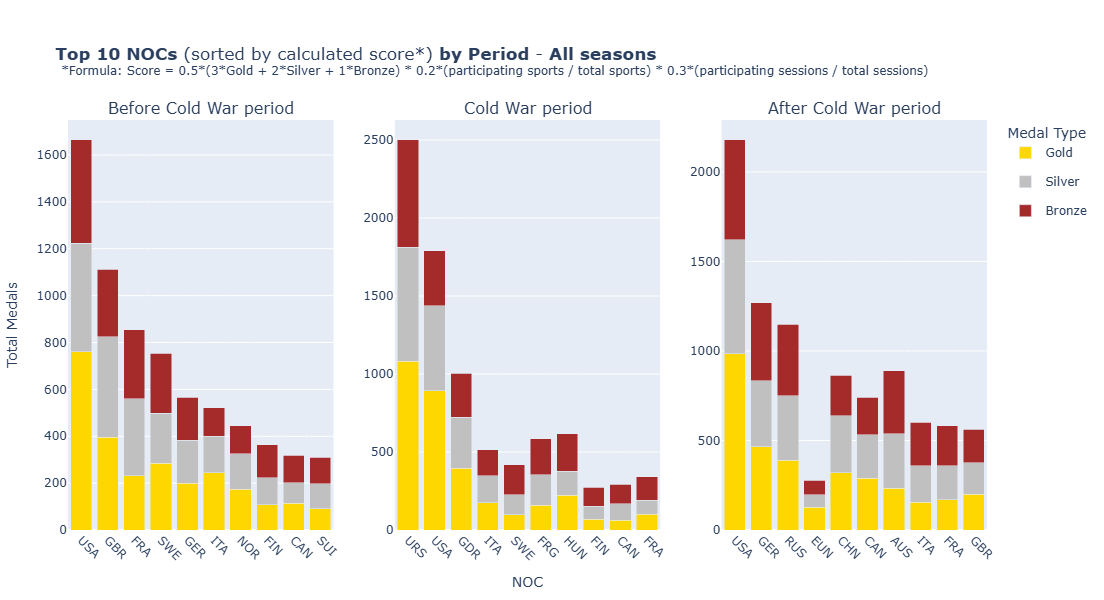

In [91]:
# data
pre_cold_war_opa = calculate_and_process_opa(pre_cold_war_df)
cold_war_opa = calculate_and_process_opa(cold_war_df)
post_cold_war_opa = calculate_and_process_opa(post_cold_war_df)
# display
plot_top_nocs_medals_by_period(pre_cold_war_opa, cold_war_opa, post_cold_war_opa, season='All seasons')

#### Data 'Winter season'

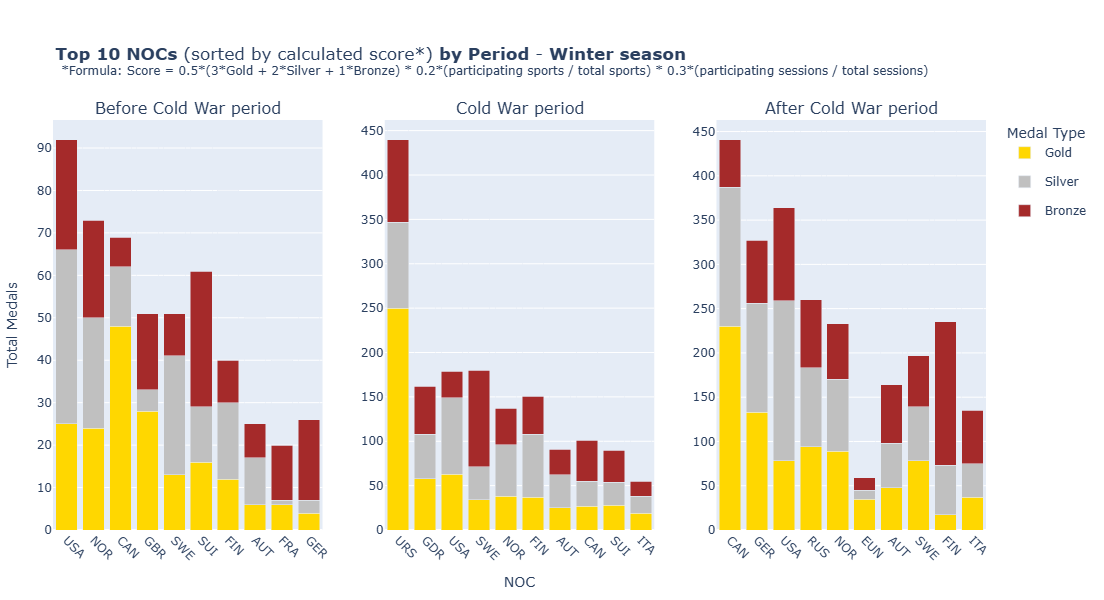

In [92]:
# data
pre_cold_war_opa = calculate_and_process_opa(pre_cold_war_df_w)
cold_war_opa = calculate_and_process_opa(cold_war_df_w)
post_cold_war_opa = calculate_and_process_opa(post_cold_war_df_w)
# display
plot_top_nocs_medals_by_period(pre_cold_war_opa, cold_war_opa, post_cold_war_opa, season='Winter season')

#### Data 'Summer season'

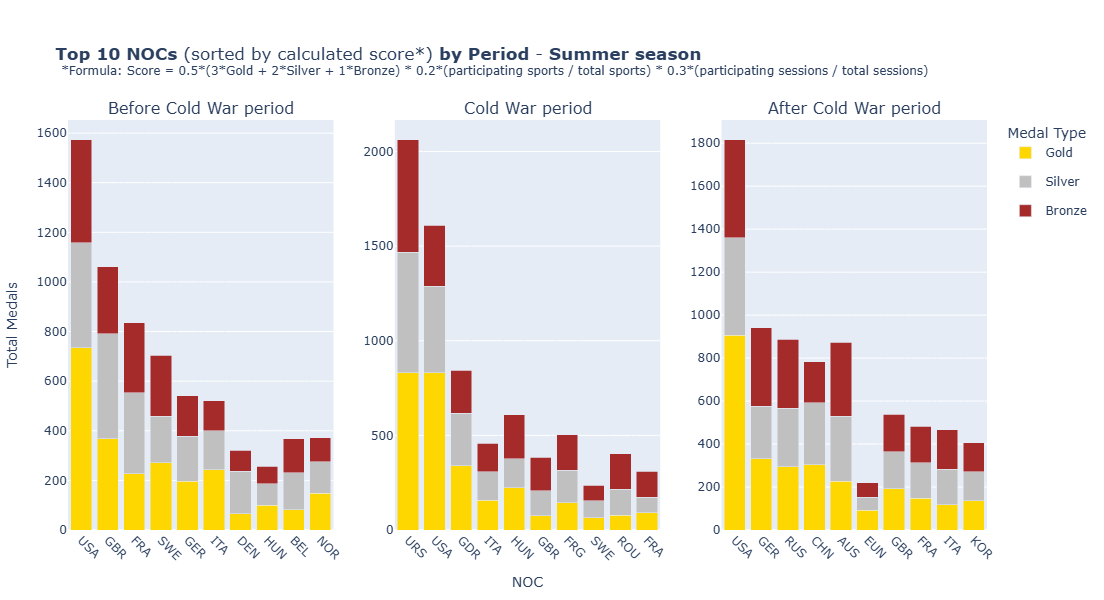

In [93]:
# data
pre_cold_war_opa = calculate_and_process_opa(pre_cold_war_df_s)
cold_war_opa = calculate_and_process_opa(cold_war_df_s)
post_cold_war_opa = calculate_and_process_opa(post_cold_war_df_s)
# display
plot_top_nocs_medals_by_period(pre_cold_war_opa, cold_war_opa, post_cold_war_opa, season='Summer season')

Pour approfondir l'analyse, nous aurions pu explorer d'autres méthodes de comparaison, comme l'analyse des tendances temporelles, l'identification de profils de performance par regroupement (clustering) ou la comparaison de la performance des pays par rapport à leurs ressources économiques

### Analyses par genre

#### Indicateurs de parité et leur évolution

- Répartion du total médailles par genre

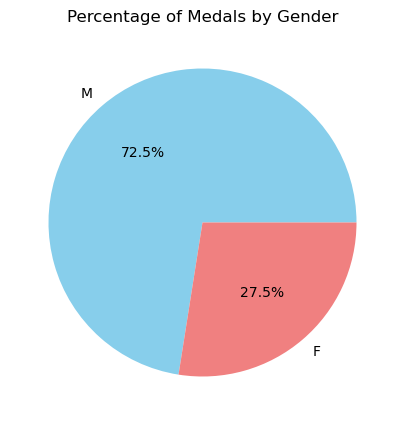

In [94]:
# By genre
gender_counts = df['Sex'].value_counts()

# Create plot
plt.figure(figsize=(6, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Percentage of Medals by Gender')
plt.show()

- Indicateurs de parité de genre

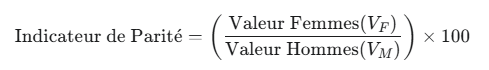

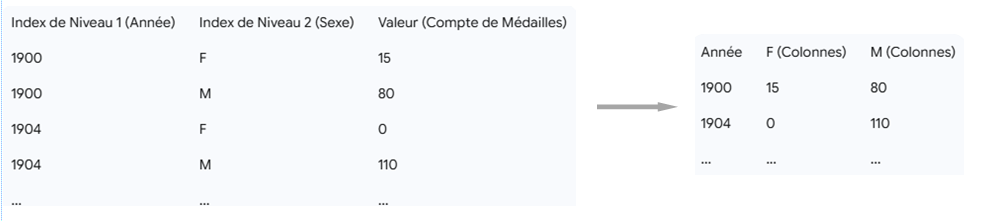

In [95]:
# 1. Calculate the indicators in a single step
# Create a DataFrame for medal parity by grouping and unstacking the data.
medal_parity_df = (
    df_medals.dropna(subset=['Medal'])
    .groupby('Year')['Sex'].value_counts().unstack(fill_value=0)
)
    
medal_parity_df['Medal_Parity'] = medal_parity_df['F'] / medal_parity_df['M'] * 100

# Create a DataFrame for participation ratio by grouping and unstacking unique athletes.
participation_ratio_df = (
    df.drop_duplicates(subset=['Name', 'Year'])
    .groupby('Year')['Sex'].value_counts().unstack(fill_value=0)
)

participation_ratio_df['Participation_Ratio'] = ((participation_ratio_df['F'] 
                                                  / participation_ratio_df['M']) * 100)

# 2. Merge the final results
# Merge the two final DataFrames on their common index (Year).
merged_df = pd.merge(
    medal_parity_df[['Medal_Parity']],
    participation_ratio_df[['Participation_Ratio']],
    left_index=True,
    right_index=True,
    how='inner'
).reset_index()

# Display the final merged DataFrame
print(merged_df.tail())

Sex  Year  Medal_Parity  Participation_Ratio
30   2008         83.51                73.19
31   2010         78.69                68.66
32   2012         89.74                79.31
33   2014         79.82                67.11
34   2016         91.94                81.90


- Evolution de ces indicateurs au fil du temps

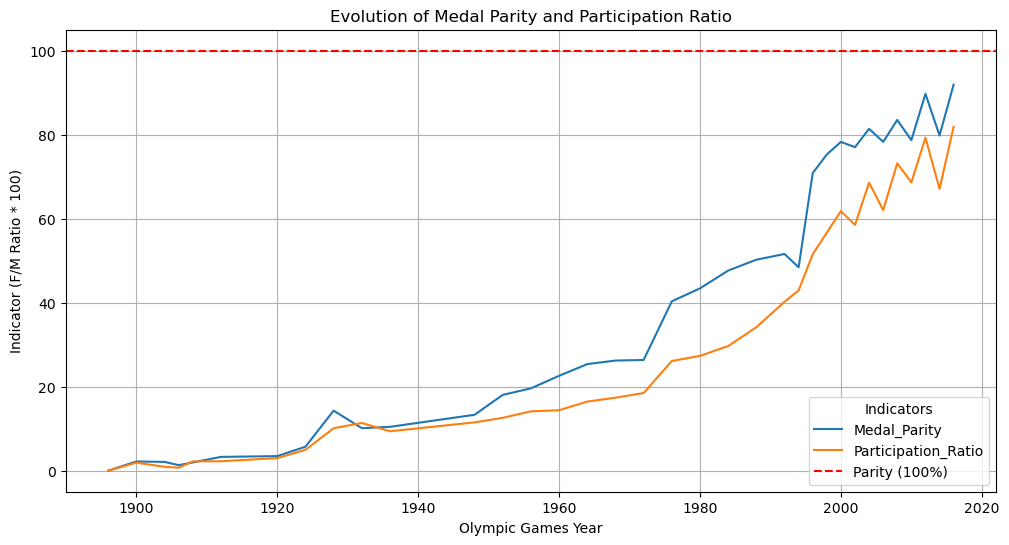

In [96]:
# Set up the plot size
plt.figure(figsize=(12, 6))

# Use pd.melt() to reshape the DataFrame for easy plotting with Seaborn
# 'Year' becomes the ID variable, while 'Medal_Parity' and 'Participation_Ratio' are melted into 'Indicator' and 'Value' columns
df_plot = pd.melt(merged_df, id_vars=['Year'], value_vars=['Medal_Parity', 'Participation_Ratio'],
                  var_name='Indicator', value_name='Value')

# Create a line plot with 'Year' on the x-axis, the melted 'Value' on the y-axis, and a separate line for each 'Indicator'
sns.lineplot(data=df_plot, x='Year', y='Value', hue='Indicator')

# Set the title and axis labels
plt.title('Evolution of Medal Parity and Participation Ratio')
plt.xlabel('Olympic Games Year')
plt.ylabel('Indicator (F/M Ratio * 100)')

# Add a horizontal line at y=100 to represent perfect parity
plt.axhline(y=100, color='r', linestyle='--', label='Parity (100%)')

# Customize the legend to show the indicator names
plt.legend(title='Indicators')

# Add a grid for better readability
plt.grid(True)

# Display the plot
plt.show()

#### Evolution du nombre de médailles par genre

- Préparation des données

In [97]:
# Count medals by year, sex, and season
medals_over_time = df_medals.groupby(['Year', 'Sex', 'Season'])['Medal'].size().unstack(level=[1, 2])
medals_over_time.interpolate(method='linear', inplace=True)

- Visualisation classique

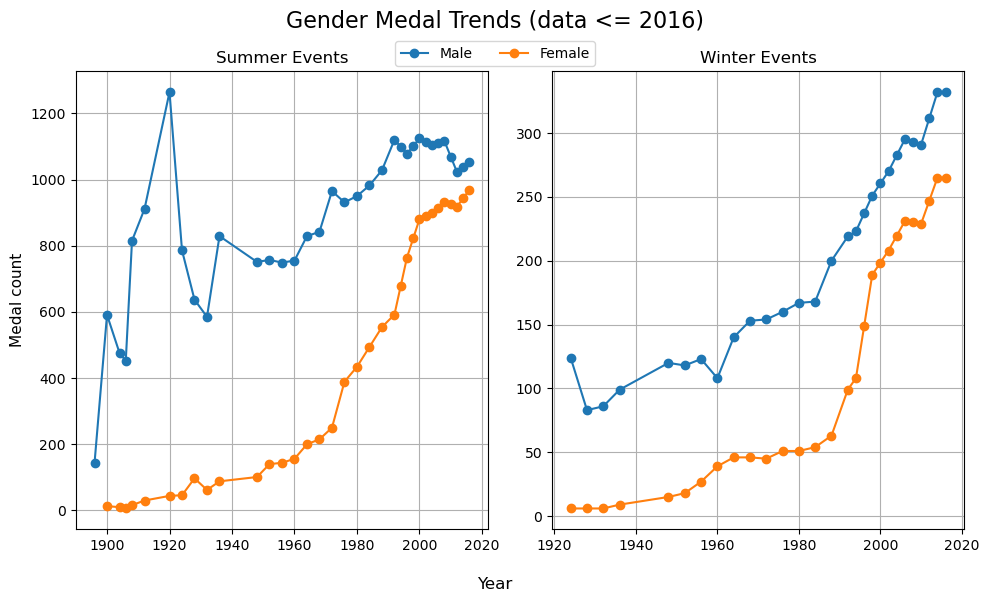

In [98]:
# Create the plots
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plot for Summer events
axes[0].plot(medals_over_time.index, medals_over_time[('M', 'Summer')], label='Male', marker='o')
axes[0].plot(medals_over_time.index, medals_over_time[('F', 'Summer')], label='Female', marker='o')
axes[0].set_title("Summer Events")
axes[0].set_ylabel('Medal count', fontsize=11)
axes[0].grid(True)

# Plot for Winter events
axes[1].plot(medals_over_time.index, medals_over_time[('M', 'Winter')], marker='o')
axes[1].plot(medals_over_time.index, medals_over_time[('F', 'Winter')], marker='o')
axes[1].set_title("Winter Events")
axes[1].grid(True)

# Create a single legend at the top center
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.94), ncol=2)

# Add a suptitle
fig.suptitle('Gender Medal Trends (data <= 2016)', fontsize=16)

# Single and centered x-axis label
fig.supxlabel('Year')

plt.tight_layout()  # Adjust layout
plt.show()

- Visualisation avec Gap (zone ombrée pour visualisation évolution écart de genre)

In [99]:
import plotly.subplots as sp
def create_plotly_subplots_with_area_gap(medals_over_time):
    """
    Creates Plotly subplots showing the temporal evolution of medal counts,
    with an added shaded area representing the gap between male and female medals.

    Args:
        medals_over_time (pd.DataFrame): DataFrame with medal counts over time,
                                         indexed by year and columns as MultiIndex (gender, season).
    """

    # Create subplots with two columns for Summer and Winter events
    fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("Summer events", "Winter events"))

    # Calculate the difference between male and female medals for each season
    medals_over_time['Summer_diff'] = medals_over_time[('M', 'Summer')] - medals_over_time[('F', 'Summer')]
    medals_over_time['Winter_diff'] = medals_over_time[('M', 'Winter')] - medals_over_time[('F', 'Winter')]

    # Summer events plot
    fig.add_trace(go.Scatter(
        x=medals_over_time.index,
        y=medals_over_time[('M', 'Summer')],
        mode='lines+markers',
        name='Male',
        line=dict(color='blue'),
        legendgroup="Summer",
        showlegend=True
    ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=medals_over_time.index,
        y=medals_over_time[('F', 'Summer')],
        mode='lines+markers',
        name='Female',
        line=dict(color='red'),
        legendgroup="Summer",
        showlegend=True
    ), row=1, col=1)

    # Add the gray gap's shaded area for Summer events
    fig.add_trace(go.Scatter(
        x=medals_over_time.index,
        y=medals_over_time['Summer_diff'],
        name='Gap (M-F)',
        line=dict(color='gray', width=1),
        fill='tozeroy',
        fillcolor='rgba(128, 128, 128, 0.3)',
        legendgroup="Gap",
        showlegend=True,
        hoverinfo='skip'
    ), row=1, col=1)

    # Winter events plot
    fig.add_trace(go.Scatter(
        x=medals_over_time.index,
        y=medals_over_time[('M', 'Winter')],
        mode='lines+markers',
        name='Male',
        line=dict(color='blue'),
        legendgroup="Winter",
        showlegend=False
    ), row=1, col=2)

    fig.add_trace(go.Scatter(
        x=medals_over_time.index,
        y=medals_over_time[('F', 'Winter')],
        mode='lines+markers',
        name='Female',
        line=dict(color='red'),
        legendgroup="Winter",
        showlegend=False
    ), row=1, col=2)

    # Add the gray gap's shaded area for Winter events
    fig.add_trace(go.Scatter(
        x=medals_over_time.index,
        y=medals_over_time['Winter_diff'],
        name='Gap (M-F)',
        line=dict(color='gray', width=1),
        fill='tozeroy',
        fillcolor='rgba(128, 128, 128, 0.3)',
        legendgroup="Gap",
        showlegend=False,
        hoverinfo='skip'
        
    ), row=1, col=2)

    # Update layout with title, axis labels, and size
    fig.update_layout(
        title_text='Gender Medal Trends (data <= 2016)',
        title_x=0.5,
        xaxis1_title='Year',
        yaxis1_title='Medal count',
        xaxis2_title='Year',
        yaxis2_title='Medal count',
        width=1000,
        height=500
    )

    # Show the figure
    fig.show(renderer='notebook_connected')

In [100]:
create_plotly_subplots_with_area_gap(medals_over_time)

#### Evolution IMC au fil du temps par genre et par saison

In [101]:
df.head(2)

,ID,Name,Sex,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Age,BMI,Year_City_Season,Period,Medal_score
0,1,A Dijiang,M,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,24.00,24.69,1992_Barcelona_S,Post_Cold_War,0
1,2,A Lamusi,M,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,23.00,20.76,2012_London_S,Post_Cold_War,0


- Préparation des données

In [102]:
# Grouping (By Sex and Season) and calculating the Mean BMI 
bmi_by_year_sex_season = df.groupby(['Sex', 'Season', 'Year'])['BMI'].mean().round(2)
bmi_by_year_sex_season.head()

Sex  Season  Year
F    Summer  1900   22.96
             1904   22.60
             1906   22.89
             1908   23.44
             1912   22.30
Name: BMI, dtype: float64

In [103]:
# Unstack the DataFrame to separate seasons and sexes into distinct columns
bmi_df = bmi_by_year_sex_season.unstack(['Sex', 'Season'])
bmi_df.head()

Sex         F             M       
Season Summer Winter Summer Winter
Year                              
1896      NaN    NaN  22.48    NaN
1900    22.96    NaN  22.66    NaN
1904    22.60    NaN  22.53    NaN
1906    22.89    NaN  22.59    NaN
1908    23.44    NaN  22.54    NaN

In [104]:
# Vous pouvez également le réorganiser pour une meilleure lisibilité si nécessaire
bmi_df = bmi_df.swaplevel(0, 1, axis=1).sort_index(axis=1)
bmi_df.head(10)

Season Summer       Winter      
Sex         F     M      F     M
Year                            
1896      NaN 22.48    NaN   NaN
1900    22.96 22.66    NaN   NaN
1904    22.60 22.53    NaN   NaN
1906    22.89 22.59    NaN   NaN
1908    23.44 22.54    NaN   NaN
1912    22.30 22.43    NaN   NaN
1920    21.96 22.53    NaN   NaN
1924    22.34 22.54  22.46 22.61
1928    21.90 22.64  22.22 22.49
1932    22.17 22.93  21.50 22.48

In [105]:
# Replace NaN by next year values
bmi_df_filled = bmi_df.bfill()
bmi_df_filled.head()

Season Summer       Winter      
Sex         F     M      F     M
Year                            
1896    22.96 22.48  22.46 22.61
1900    22.96 22.66  22.46 22.61
1904    22.60 22.53  22.46 22.61
1906    22.89 22.59  22.46 22.61
1908    23.44 22.54  22.46 22.61

In [106]:
# Initialize the dictionary to store BMI data
seasons_bmi_data = {
    'Summer': {'Female': pd.Series(dtype='float64'), 'Male': pd.Series(dtype='float64')},
    'Winter': {'Female': pd.Series(dtype='float64'), 'Male': pd.Series(dtype='float64')}
}

# Iterate over the MultiIndex columns to populate the dictionary
for season, sex in bmi_df_filled.columns:
    # Get the column data (a pandas Series)
    series_data = bmi_df_filled[(season, sex)]
    
    # Map the Sex code to a more descriptive key
    sex_key = 'Male' if sex == 'M' else 'Female'
    
    # Assign the Series to the correct location in the dictionary
    seasons_bmi_data[season][sex_key] = series_data

- Visualisation

In [107]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

def plot_bmi_trends(bmi_data: dict, title: str, renderer: str = "notebook_connected"):
    """
    Creates and displays a 2x2 subplot of BMI trends over time for different
    sexes and seasons, using Plotly.

    Args:
        bmi_data (dict): A nested dictionary containing BMI data, with keys for
                         'Summer' and 'Winter', and sub-keys for 'Male' and 'Female'.
                         Example: {'Summer': {'Male': series_data, 'Female': series_data}, ...}
        title (str): The main title for the plot.
        renderer (str): The renderer to use for displaying the plot (e.g., 'notebook_connected', 'colab').
    """
    # Create subplots
    fig = make_subplots(rows=2, cols=2,
                        subplot_titles=('Male BMI Trend Over Time (Summer)',
                                        'Female BMI Trend Over Time (Summer)',
                                        'Male BMI Trend Over Time (Winter)',
                                        'Female BMI Trend Over Time (Winter)'))

    # Define a single color for all lines
    color = 'steelblue'

    # Add traces using nested loops for dynamic plotting
    for row, season in enumerate(['Summer', 'Winter'], start=1):
        for col, sex in enumerate(['Male', 'Female'], start=1):
            data = bmi_data[season][sex]
            fig.add_trace(go.Scatter(x=data.index, y=data.values, mode='lines+markers',
                                     line=dict(color=color), marker=dict(color=color),
                                     name=f'{sex} - {season}'),
                          row=row, col=col)

    # Update layout
    fig.update_layout(title=title,
                      showlegend=False,
                      width=1050,
                      height=600)

    # Update x-axis and y-axis labels
    for row in range(1, 3):
        for col in range(1, 3):
            fig.update_yaxes(title_text='BMI (mean)', title_font=dict(size=10), row=row, col=col)
            fig.update_xaxes(title_text='Year', title_font=dict(size=10), row=row, col=col)

    fig.show(renderer=renderer)

In [108]:
plot_bmi_trends(seasons_bmi_data, 'BMI Trend Over Time by Gender and Season (data <= 2016)')

### Focus France

#### Top 10 performers par saison

In [109]:
plot_top_olympic_performers(df_medals_fra, season='All season', noc='FRA')

,Name,NOC,total_score,total_medals,gold_medals,silver_medals,bronze_medals
0,Philippe Louis Eugne Cattiau,FRA,18,8,3,4,1
1,Roger Franois Ducret,FRA,18,8,3,4,1
2,Christian Marie Auguste d'Oriola,FRA,16,6,4,2,0
3,Lucien Alphonse Paul Gaudin,FRA,16,6,4,2,0
4,"Maxime Omer Mathieu ""Max"" Omer-Dcugis",FRA,15,6,4,1,1
5,"Georges Eugne William ""Go"" Buchard",FRA,13,6,2,3,1
6,Lon Ernest Moreaux,FRA,13,7,2,2,3
7,Daniel Yves Morelon,FRA,12,5,3,1,1
8,Philippe Claude Riboud,FRA,12,6,2,2,2
9,Alexandre Auguste Lippmann,FRA,11,5,2,2,1


In [110]:
plot_top_olympic_performers(df_medals_fra_s, season='Summer season', noc='FRA')

,Name,NOC,total_score,total_medals,gold_medals,silver_medals,bronze_medals
0,Philippe Louis Eugne Cattiau,FRA,18,8,3,4,1
1,Roger Franois Ducret,FRA,18,8,3,4,1
2,Christian Marie Auguste d'Oriola,FRA,16,6,4,2,0
3,Lucien Alphonse Paul Gaudin,FRA,16,6,4,2,0
4,"Maxime Omer Mathieu ""Max"" Omer-Dcugis",FRA,15,6,4,1,1
5,"Georges Eugne William ""Go"" Buchard",FRA,13,6,2,3,1
6,Lon Ernest Moreaux,FRA,13,7,2,2,3
7,Daniel Yves Morelon,FRA,12,5,3,1,1
8,Philippe Claude Riboud,FRA,12,6,2,2,2
9,Alexandre Auguste Lippmann,FRA,11,5,2,2,1


In [111]:
plot_top_olympic_performers(df_medals_fra_w, season='Winter season', noc='FRA')

,Name,NOC,total_score,total_medals,gold_medals,silver_medals,bronze_medals
0,Martin Fourcade,FRA,10,4,2,2,0
1,Jean-Claude Killy,FRA,9,3,3,0,0
2,Micheline Franoise Marielle Goitschel,FRA,8,3,2,1,0
3,Andre Marguerite Blanche Brunet-Joly,FRA,7,3,2,0,1
4,Henri Jean Oreiller,FRA,7,3,2,0,1
5,Pierre mile Ernest Brunet,FRA,7,3,2,0,1
6,Anne Briand-Bouthiaux,FRA,6,3,1,1,1
7,Franck Piccard,FRA,6,3,1,1,1
8,Christine Marion Elisabeth Goitschel (-Branger),FRA,5,2,1,1,0
9,Karine Martine Ruby,FRA,5,2,1,1,0


#### Evolution du nombre et de la qualité des médailles au fil du temps

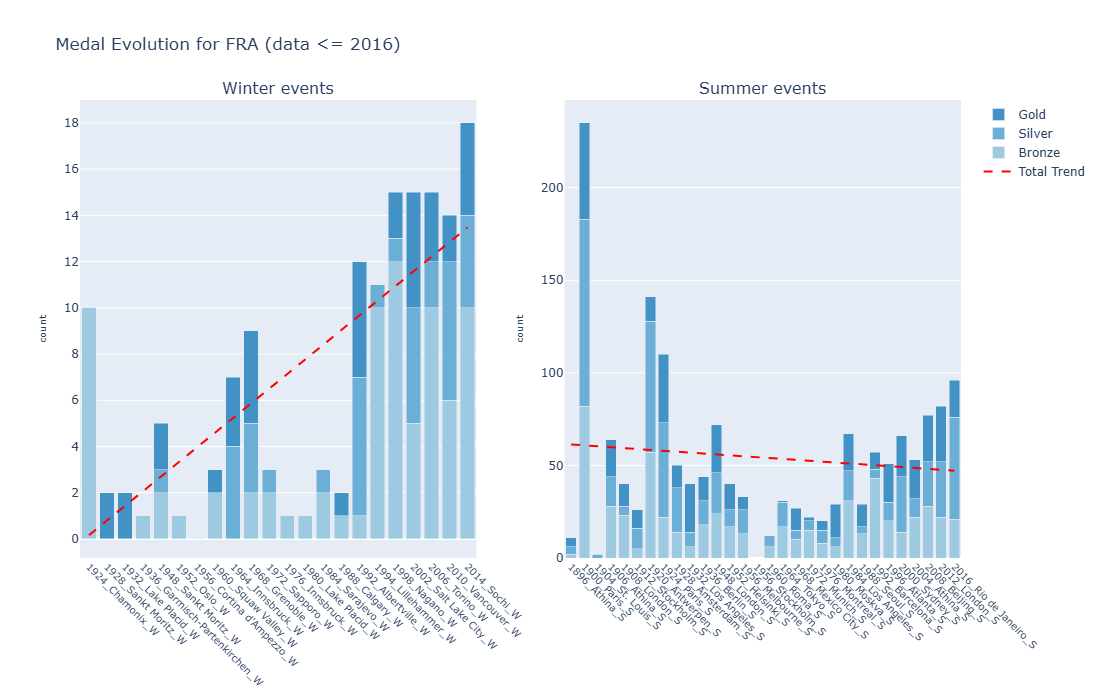

In [112]:
import plotly.subplots as sp
import plotly.colors as pc

# Define the NOC to focus on
noc = 'FRA'

# Filter data for the specified NOC
noc_data = df[df['NOC'] == noc]

# Separate winter and summer editions
winter_editions = noc_data[noc_data['Year_City_Season'].str.lower().str.endswith('w')]
summer_editions = noc_data[~noc_data['Year_City_Season'].str.lower().str.endswith('w')]

winter_medal_counts = winter_editions.groupby(['Year_City_Season', 'Medal']).size().unstack(fill_value=0).reset_index()
summer_medal_counts = summer_editions.groupby(['Year_City_Season', 'Medal']).size().unstack(fill_value=0).reset_index()

# Calculate total medals
winter_medal_counts['Total'] = winter_medal_counts['Bronze'] + winter_medal_counts['Silver'] + winter_medal_counts['Gold']
summer_medal_counts['Total'] = summer_medal_counts['Bronze'] + summer_medal_counts['Silver'] + summer_medal_counts['Gold']

# Create subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=(f'Winter events', f'Summer events'))

# Define medal order and colors
medal_order = ['Bronze', 'Silver', 'Gold']
colors = pc.sequential.Blues[3:6]

# Function to add trend line for total medals
def add_trend_line(fig, data, row, col, showlegend=False):
    x = np.arange(len(data['Year_City_Season']))
    y = data['Total']
    coefficients = np.polyfit(x, y, 1)
    trend_line = np.poly1d(coefficients)(x)
    fig.add_trace(go.Scatter(x=data['Year_City_Season'],
                             y=trend_line, mode='lines',
                             name='Total Trend',
                             line=dict(color='red', dash='dash'),
                             showlegend=showlegend), row=row, col=col)

# Add stacked bar chart for winter events
for i, medal_type in enumerate(medal_order):
    trace = go.Bar(x=winter_medal_counts['Year_City_Season'],
                   y=winter_medal_counts[medal_type],
                   name=medal_type,
                   marker_color=colors[i])
    
    fig.add_trace(trace, row=1, col=1)
    fig.data[-1].showlegend = False

add_trend_line(fig, winter_medal_counts, 1, 1, showlegend=True) # Adding the trend line for winter, with legend

# Add stacked bar chart for summer events
for i, medal_type in enumerate(medal_order):
    trace = go.Bar(x=summer_medal_counts['Year_City_Season'],
                   y=summer_medal_counts[medal_type],
                   name=medal_type,
                   marker_color=colors[i])
    
    fig.add_trace(trace, row=1, col=2)
    fig.data[-1].showlegend = True

add_trend_line(fig, summer_medal_counts, 1, 2, showlegend=False) # Adding the trend line for Summer, with legend

# Update layout
fig.update_layout(
    title_text=f'Medal Evolution for {noc} (data <= 2016)',
    barmode='stack',
    yaxis_title='count',
    yaxis2_title='count',
    xaxis_title_font=dict(size=10),
    yaxis_title_font=dict(size=10),
    xaxis2_title_font=dict(size=10),
    yaxis2_title_font=dict(size=10),
    width=1000,  # Set the width of the figure
    height=700  # Set the height of the figure
)

# Update hovertemplate
fig.update_traces(
    hovertemplate=(
        '<b>%{x}</b><br>'
        '%{data.name}: %{y}<br>'  # Add medal type from trace name
        '<extra></extra>'
    )
)

# Rotate x-axis labels for better readability and modify font size
fig.update_xaxes(tickangle=45, tickfont=dict(size=10))

# Show plot

#### Evolution des indicateurs de parité au fil du temps

In [113]:
# 1. Calculate the indicators in a single step
# Create a DataFrame for medal parity by grouping and unstacking the data.
medal_parity_fra_df = (
    df_medals_fra
    .dropna(subset=['Medal'])
    .groupby('Year')['Sex'].value_counts()
    .unstack(fill_value=0)
)

medal_parity_fra_df['Medal_Parity'] = (
    (medal_parity_fra_df['F'] / medal_parity_fra_df['M']) * 100
).round(2)

# Create a DataFrame for participation ratio by grouping and unstacking unique athletes.
participation_ratio_fra_df = (
    df_fra
    .drop_duplicates(subset=['Name', 'Year'])
    .groupby('Year')['Sex'].value_counts()
    .unstack(fill_value=0)
)

participation_ratio_fra_df['Participation_Ratio'] = (
    (participation_ratio_fra_df['F'] / participation_ratio_fra_df['M']) * 100
).round(2)

# 2. Merge the final results
# Merge the two final DataFrames on their common index (Year).
merged_fra_df = pd.merge(
    medal_parity_fra_df[['Medal_Parity']],
    participation_ratio_fra_df[['Participation_Ratio']],
    left_index=True,
    right_index=True,
    how='inner'
).reset_index()


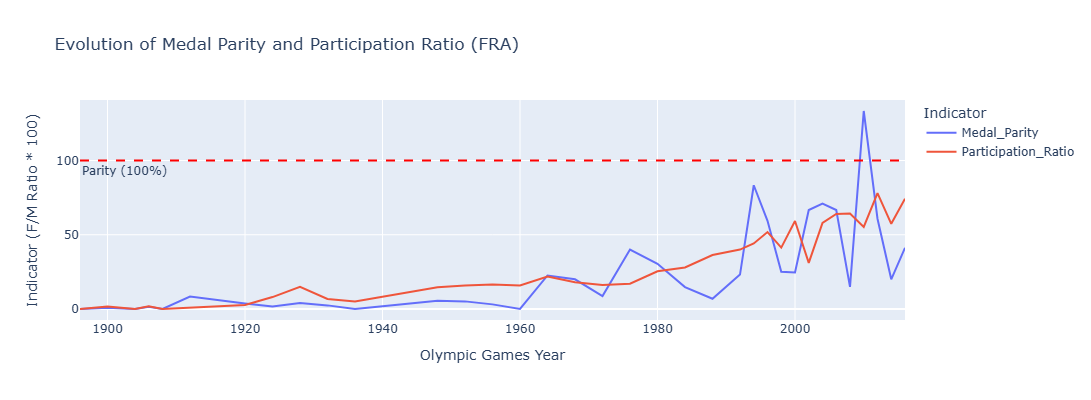

In [114]:
import plotly.express as px
import pandas as pd

# Reshape the DataFrame to 'long' format for Plotly (Identical to your code)
# 'Year' becomes the ID variable; 'Medal_Parity' and 'Participation_Ratio' are the value variables
df_plot = pd.melt(merged_fra_df, id_vars=['Year'], value_vars=['Medal_Parity', 'Participation_Ratio'],
                  var_name='Indicator', value_name='Value')

# 2. Create the interactive line plot with Plotly Express
fig = px.line(
    df_plot,
    x='Year',
    y='Value',
    color='Indicator',
    # Set  title for the chart
    title='Evolution of Medal Parity and Participation Ratio (FRA)',
    # Set the English labels for the axes
    labels={'Value': 'Indicator (F/M Ratio * 100)', 'Year': 'Olympic Games Year'},
    height=400 # Define the chart height
)

# 3. Add the parity line (y=100)
fig.add_hline(y=100, line_dash="dash", line_color="red",
              annotation_text="Parity (100%)",
              annotation_position="bottom left")

# 4. Display the interactive chart
fig.show()

In [115]:
# Count medals by year, sex, and season, noc =FRA
medals_over_time_fra = df_medals_fra.groupby(['Year', 'Sex', 'Season'])['Medal'].size().unstack(level=[1, 2])
medals_over_time_fra.interpolate(method='linear', inplace=True)
medals_over_time_fra = medals_over_time_fra.round(0)
zoom_data = medals_over_time_fra.loc[2000:2016].copy()

In [116]:
create_plotly_subplots_with_area_gap(zoom_data)

#### Evolution ranking OPA score du NOC 'FRA' au fil du temps

- Fonction pour calculer OPA score

In [117]:
def calculate_opa(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculates the Olympic Performance Score (OPA) and its rank for each NOC per session.
    The final aggregation step is removed to return session-level data for plotting evolution.
    """
    weights = {'medals': 0.5, 'diversity': 0.2, 'regularity': 0.3}

    # --- Step 1: Calculate raw scores for each NOC per session ---
    df['Total_Sports_Session'] = df.groupby('Year_City_Season')['Sport'].transform('nunique')

    scores_per_session = df.groupby(['NOC', 'Year_City_Season']).apply(
        lambda group: pd.Series({
            'Medal_Score_Session': (
                3 * (group['Medal'] == 'Gold').sum() +
                2 * (group['Medal'] == 'Silver').sum() +
                1 * (group['Medal'] == 'Bronze').sum()
            ),
            'Diversity_Score_Session': group['Sport'].nunique() / group['Total_Sports_Session'].iloc[0]
        }),
        include_groups=False
    ).reset_index()

    # --- Step 2: Calculate Regularity Score ---
    total_unique_sessions = df['Year_City_Season'].nunique()
    
    regularity_score = (
        df.drop_duplicates(subset=['NOC', 'Year_City_Season'])
        .groupby('NOC')['Year_City_Season']
        .nunique()
    )
    
    scores_per_session = scores_per_session.merge(
        regularity_score.rename('Regularity_Count'),
        on='NOC',
        how='left'
    )
    
    scores_per_session['Regularity_Score'] = (
        scores_per_session['Regularity_Count'] / total_unique_sessions
    )

    # --- Step 3: Prepare for Final Calculation (Extract Year and Season) ---

    # Extract 'Year' and 'Season' from 'Year_City_Season'
    scores_per_session['Year'] = scores_per_session['Year_City_Season'].str[:4].astype(int)
    scores_per_session['Season'] = scores_per_session['Year_City_Season'].str[-1]

    # --- Step 4: Normalize Session Scores and Calculate OPA Final Score ---
    
    # Normalization (Min-Max Scaler) for Medal_Score_Session by session context
    scores_per_session['Medal_Score_Norm'] = (
    scores_per_session
    .groupby('Year_City_Season')['Medal_Score_Session']
    .transform(lambda x: (x - x.min()) / (x.max() - x.min()) if x.max() != x.min() else 0)
)
    
    scores_per_session['Diversity_Score_Norm'] = scores_per_session['Diversity_Score_Session']

    # The final OPA score is the weighted average of the three normalized components
    scores_per_session['OPA_Final_Score'] = (
        scores_per_session['Medal_Score_Norm'] * weights['medals'] +
        scores_per_session['Diversity_Score_Norm'] * weights['diversity'] +
        scores_per_session['Regularity_Score'] * weights['regularity']
    )

    # --- Step 5: Calculate OPA Rank per Session (Crucial for plotting evolution) ---
    
    # Calculate OPA rank for each NOC within each Olympic session
    scores_per_session['Opa_rank'] = (
    scores_per_session
    .groupby('Year_City_Season')['OPA_Final_Score']
    .rank(method='min', ascending=False)
)
    
    # Return the session-level data, including the necessary columns for plotting
    return scores_per_session[['NOC', 'Year', 'Season', 'OPA_Final_Score', 'Opa_rank']].copy()

- fonction pour visualiser

In [118]:
raw_dataframes = [pre_cold_war_df, cold_war_df, post_cold_war_df]
titles = ['Pre-Cold War Period', 'Cold War Period', 'Post-Cold War Period']

In [119]:
def plot_multiple_opa_rank_evolution(summer_data: list,
                                     winter_data: list,
                                     titles: list,
                                     noc_to_visualize: str):
    """
    Creates and displays two sets of plots (Summer and Winter) for the OPA rank evolution
    for a given NOC, divided into three distinct periods, displaying Summer and Winter
    results on the same row.

    Args:
        summer_data (list): A list of DataFrames for Summer games in different periods.
        winter_data (list): A list of DataFrames for Winter games in different periods.
        titles (list): The titles for the corresponding periods (e.g., ['Title 1', ...]).
        noc_to_visualize (str): The NOC code (e.g., 'FRA', 'USA') to visualize.
    """
    # Create a 2x3 grid of subplots (2 rows for Season, 3 columns for Period)
    fig, axes = plt.subplots(2, 3, figsize=(10, 6), sharex='col', sharey='row')
    
    # Iterate over the two seasons (rows)
    for row_idx, (data_list, season_name) in enumerate([
        (summer_data, 'Summer'), 
        (winter_data, 'Winter')
    ]):
        # Iterate over the three periods (columns)
        for col_idx, (df, title) in enumerate(zip(data_list, titles)):
            ax = axes[row_idx, col_idx]
            
            # Filter the data for the specific NOC
            data_noc = df[df['NOC'] == noc_to_visualize]

            # Set a common y-limit (rank) for consistency
            ax.set_ylim(0, 15)
            
            if data_noc.empty:
                ax.set_title(f"No data for {noc_to_visualize}\n{title}", fontsize=10)
                ax.grid(True)
                # Label the Y-axis only for the first column
                if col_idx == 0:
                     ax.set_ylabel(f'{season_name} OPA Rank', fontsize=12)
                ax.set_xlabel(title if row_idx == 1 else '', fontsize=10)
                continue

            # Plot the rank evolution
            sns.lineplot(data=data_noc, x='Year',
                         y='Opa_rank',
                         marker='o',
                         ax=ax,
                         color='blue' if row_idx == 0 else 'green')
            
            # Customizations
            ax.set_title(f"{title}", fontsize=12)
            ax.set_xlabel('Year' if row_idx == 1 else '', fontsize=10) # X-axis label only for the bottom row
            ax.grid(axis='y', linestyle='--')
            ax.invert_yaxis() # Lower rank is better
            
            # Label the Y-axis only for the first column
            if col_idx == 0:
                 ax.set_ylabel(f'{season_name} OPA Rank', fontsize=12)
            else:
                 ax.set_ylabel('')

            # Add rank labels on each point
            for x, y in zip(data_noc['Year'], data_noc['Opa_rank']):
                ax.text(x, y, str(int(y)), ha='left', va='bottom', fontsize=10, color='red')
            
    plt.suptitle(
    f"Evolution of {noc_to_visualize}'s OPA Rank (Summer vs. Winter) across Periods",
    fontsize=16, 
    y=1.02
)
    plt.tight_layout()
    plt.show()

- Rendu final

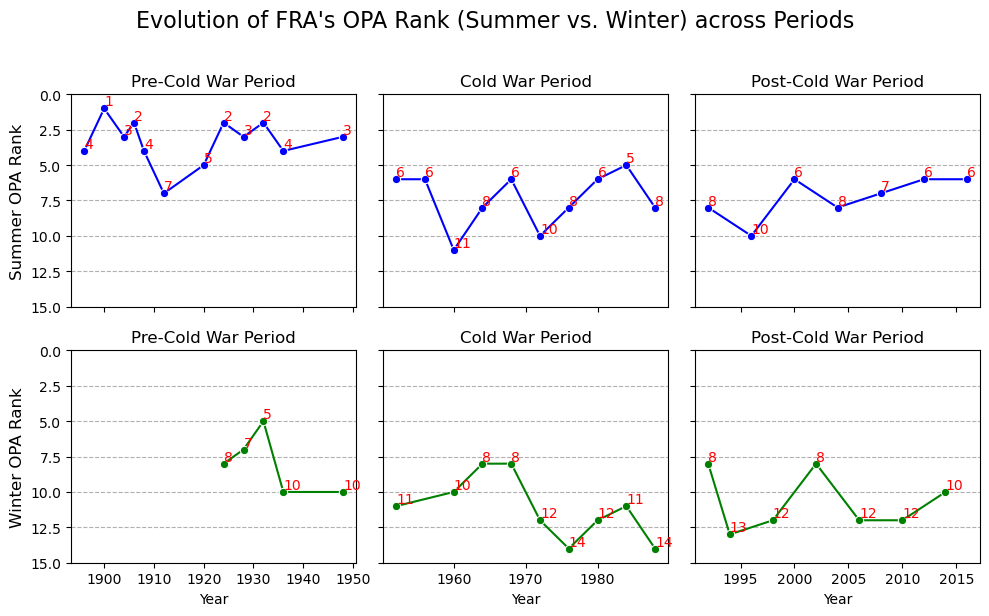

In [120]:
# Winter and Summer data
summer_dataframes = [calculate_opa(df)[lambda df_s: df_s['Season'] == 'S'].copy() for df in raw_dataframes]
winter_dataframes = [calculate_opa(df)[lambda df_w: df_w['Season'] == 'W'].copy() for df in raw_dataframes]

# Display traces
plot_multiple_opa_rank_evolution(summer_dataframes, winter_dataframes, titles, 'FRA')